In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
acs_data = pd.read_csv("Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
display(acs_data)

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010
...,...,...,...,...,...,...,...,...
98015,18 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.7%,±0.4,2021
98016,18 to 64 years,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.1%,±0.4,2021
98017,65 years and over,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),38.5%,±0.5,2021
98018,People in families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),40.0%,±0.4,2021


In [3]:
obesity_data = pd.read_csv("Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_30060\754830990.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv("Data/Nutrition_Physical_Activity_and_Obesity_Data.csv")


In [4]:
# Filter the economic dataset for unemployment rate
unemployment_df = recent_year_economic[recent_year_economic['Label (Grouping)'].str.contains('Unemployed', case=False, na=False)]
unemployment_df['Percent'] = unemployment_df['Percent'].astype(str)
unemployment_percent_df = unemployment_df[~unemployment_df['Percent'].str.contains(',', na=False)]
unemployment_percent_df['Percent'] = unemployment_percent_df['Percent'].str.replace('%', '').astype(float)
unemployment_clean_df = unemployment_percent_df[['State', 'Percent']].drop_duplicates()

# Filter the obesity dataset for obesity rates
recent_year_obesity = obesity_df[(obesity_df['YearStart'] == obesity_df['YearStart'].max()) & 
                                 (obesity_df['Class'] == 'Obesity / Weight Status') & 
                                 (obesity_df['Stratification1'] == 'Total')]
obesity_rates_df = recent_year_obesity[['LocationDesc', 'Data_Value']].drop_duplicates()

# Merge the datasets on the state name
merged_df = pd.merge(unemployment_clean_df, obesity_rates_df, left_on='State', right_on='LocationDesc', how='inner')
merged_df = merged_df.rename(columns={'Percent': 'Unemployment Rate (%)', 'Data_Value': 'Obesity Rate (%)'})

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Unemployment Rate (%)'], merged_df['Obesity Rate (%)'], color='blue')
plt.title('Obesity Rate vs. Unemployment Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Obesity Rate (%)')
plt.grid(True)
plt.show()


NameError: name 'recent_year_economic' is not defined

In [5]:
meat_slaughter_count = pd.read_csv("Data/Meat_Stats_Slaughter_Counts.csv")
meat_slaughter_count.head

<bound method NDFrame.head of            Date  Year  Month        Unit   Animal      Count  \
0      Dec-2023  2023     12  1,000 Head   Cattle   2,593.40   
1      Nov-2023  2023     11  1,000 Head   Cattle   2,729.90   
2      Oct-2023  2023     10  1,000 Head   Cattle   2,826.00   
3      Sep-2023  2023      9  1,000 Head   Cattle   2,610.60   
4      Aug-2023  2023      8  1,000 Head   Cattle   2,890.00   
...         ...   ...    ...         ...      ...        ...   
15278  Apr-1983  1983      4  1,000 Head  Turkeys  10,563.00   
15279  Mar-1983  1983      3  1,000 Head  Turkeys  11,979.00   
15280  Feb-1983  1983      2  1,000 Head  Turkeys   8,477.00   
15281  Jan-1983  1983      1  1,000 Head  Turkeys   8,532.00   
15282  Dec-1982  1982     12  1,000 Head  Turkeys  11,725.00   

      Commercial_Or_Federally_Inspected Type_Of_Meat  
0                            Commercial     Red Meat  
1                            Commercial     Red Meat  
2                            Commerc

In [6]:
meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])
meat_slaughter_count['Count']=meat_slaughter_count['Count'].str.replace(',','')
meat_slaughter_count['Count'] = meat_slaughter_count['Count'].astype(float)
meat_slaughter_count=meat_slaughter_count.groupby(['Date','Commercial_Or_Federally_Inspected','Type_Of_Meat'], as_index=False)['Count'].sum()
display(meat_slaughter_count)

C:\Users\user\AppData\Local\Temp\ipykernel_30060\9849546.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meat_slaughter_count['Date'] = pd.to_datetime(meat_slaughter_count['Date'])


,Date,Commercial_Or_Federally_Inspected,Type_Of_Meat,Count
0,1982-12-01,Commercial,Red Meat,60257.3
1,1982-12-01,Federally Inspected,Poultry,336050.0
2,1982-12-01,Federally Inspected,Red Meat,60321.1
3,1983-01-01,Commercial,Red Meat,20737.3
4,1983-01-01,Federally Inspected,Poultry,348784.0
...,...,...,...,...
1474,2023-11-01,Federally Inspected,Poultry,789591.0
1475,2023-11-01,Federally Inspected,Red Meat,27887.8
1476,2023-12-01,Commercial,Red Meat,27225.1
1477,2023-12-01,Federally Inspected,Poultry,748206.0


In [10]:
meat_slaughter_count.dropna(subset=['Count'], inplace=True)

fed_inspect_red_meat = meat_slaughter_count[(meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
fed_inspect_poultry = meat_slaughter_count[(meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Federally Inspected') & (meat_slaughter_count['Type_Of_Meat']=='Poultry')]
commercial_red_meat = meat_slaughter_count[(meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (meat_slaughter_count['Type_Of_Meat']=='Red Meat')]
commercial_poultry = meat_slaughter_count[(meat_slaughter_count['Commercial_Or_Federally_Inspected']=='Commercial') & (meat_slaughter_count['Type_Of_Meat']=='Poultry')]

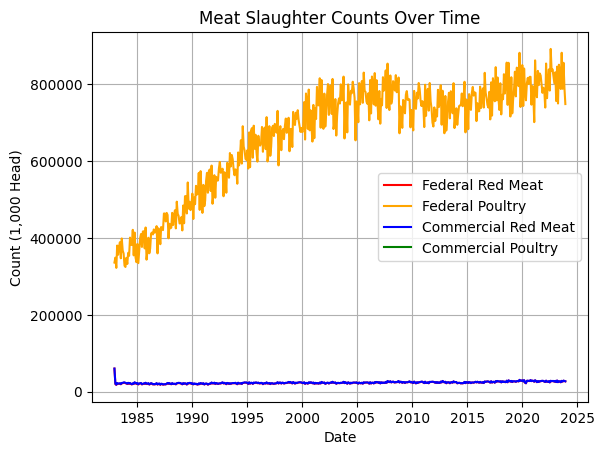

In [16]:
plt.plot(fed_inspect_red_meat['Date'], fed_inspect_red_meat['Count'], label='Federal Red Meat', color = 'red')
plt.plot(fed_inspect_poultry['Date'], fed_inspect_poultry['Count'], label='Federal Poultry', color = 'orange')
plt.plot(commercial_red_meat['Date'], commercial_red_meat['Count'], label='Commercial Red Meat', color = 'blue')
plt.plot(commercial_poultry['Date'], commercial_poultry['Count'], label='Commercial Poultry', color = 'green')

plt.title('Meat Slaughter Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count (1,000 Head)')
plt.legend()
plt.grid(True)

plt.show()